In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [3]:
data = pd.read_csv("pizza_sales.csv")
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [5]:
data.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


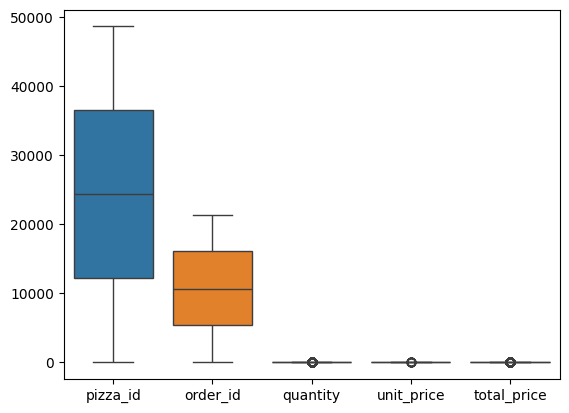

In [7]:
ax = sns.boxplot(data=data)

In [10]:
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce', dayfirst=True)
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S').dt.time
data['day_of_week'] = data['order_date'].dt.day_name()
data['hour'] = data['order_time'].apply(lambda x: x.hour)

In [11]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [13]:
df_cleaned = remove_outliers(data, 'total_price')
df_cleaned = remove_outliers(df_cleaned, 'unit_price')

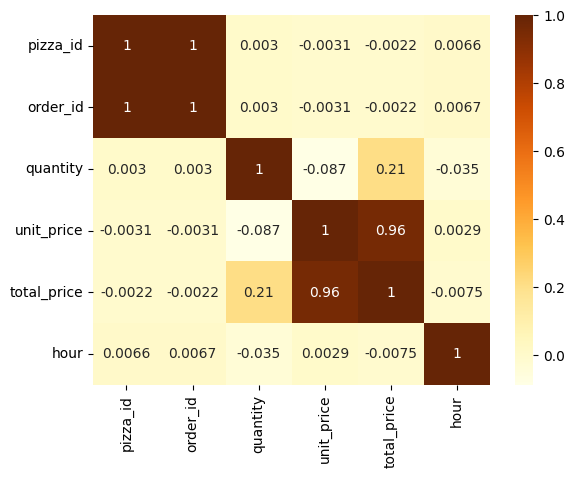

In [19]:
# Excluding non-numeric columns for correlation analysis
numeric_df_cleaned = df_cleaned.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df_cleaned.corr(),cmap = 'YlOrBr', annot =True)
plt.show()
# Total price nd unit price strongly correlated ?? 

Text(0, 0.5, 'Category Percentage')

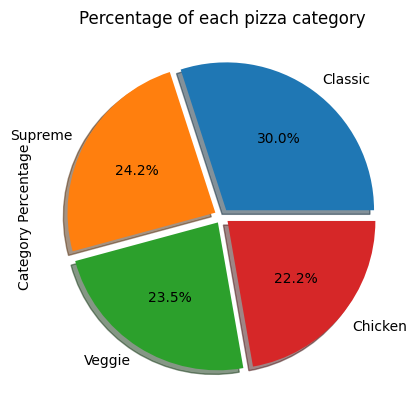

In [22]:
data['pizza_category'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.05, 0.05, 0.05 ,0.05], shadow=True)
plt.title('Percentage of each pizza category')
plt.ylabel('Category Percentage')

Text(0, 0.5, 'Count')

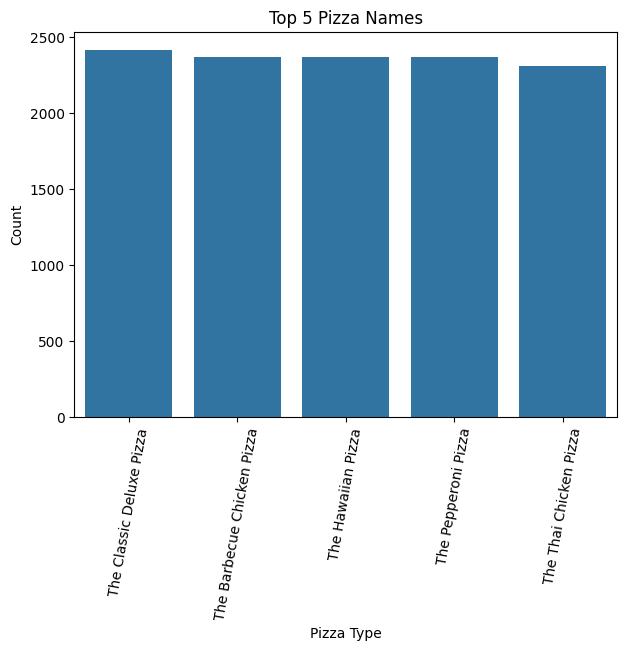

In [27]:
Top_5_types = data['pizza_name'].value_counts().head(5).index.tolist()

plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='pizza_name', order=Top_5_types  )
plt.xticks(rotation=80)
plt.title('Top 5 Pizza Names')
plt.xlabel('Pizza Type')
plt.ylabel('Count')

<Axes: xlabel='pizza_size', ylabel='count'>

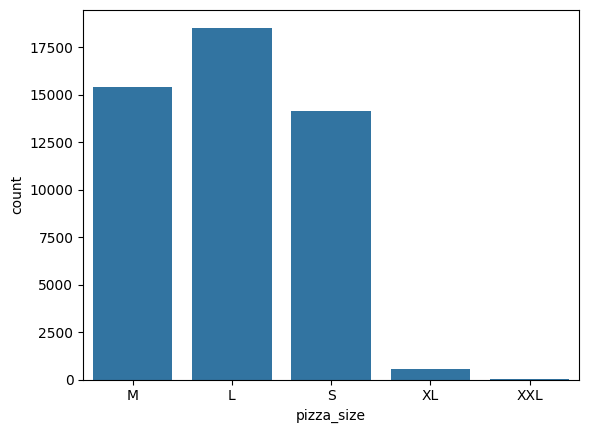

In [29]:
sns.countplot(data = data, x="pizza_size" )

Text(0, 0.5, 'Count')

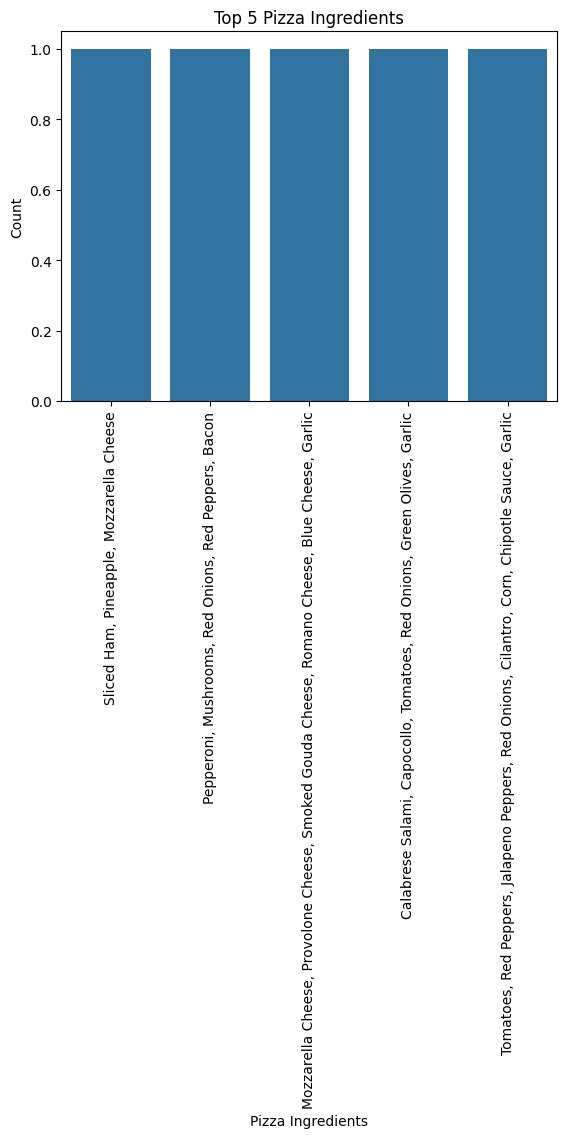

In [36]:
top5ingre = data['pizza_ingredients'].head()
sns.countplot(data=data, x = top5ingre)
plt.xticks(rotation=90)
plt.title('Top 5 Pizza Ingredients')
plt.xlabel('Pizza Ingredients')
plt.ylabel('Count')

In [37]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,hour
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,11
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,11
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,11


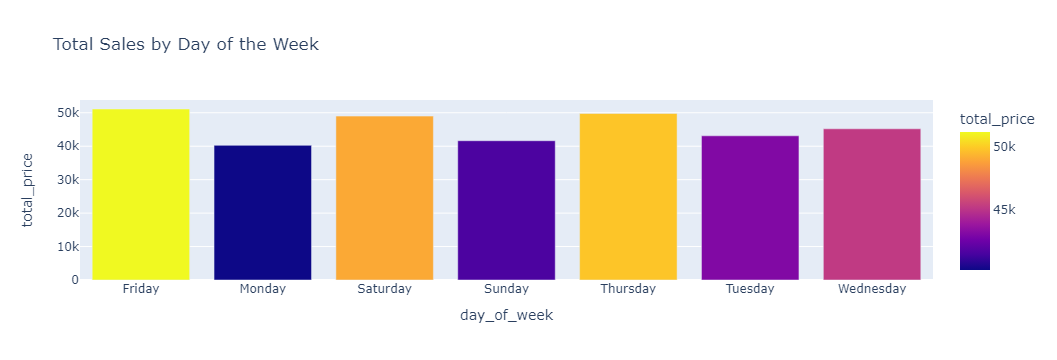

In [40]:
import plotly.express as px
orders_by_day = df_cleaned.groupby('day_of_week')['total_price'].sum().reset_index()
fig_bar_day = px.bar(orders_by_day, x='day_of_week', y='total_price', title='Total Sales by Day of the Week', color='total_price')
fig_bar_day.show()

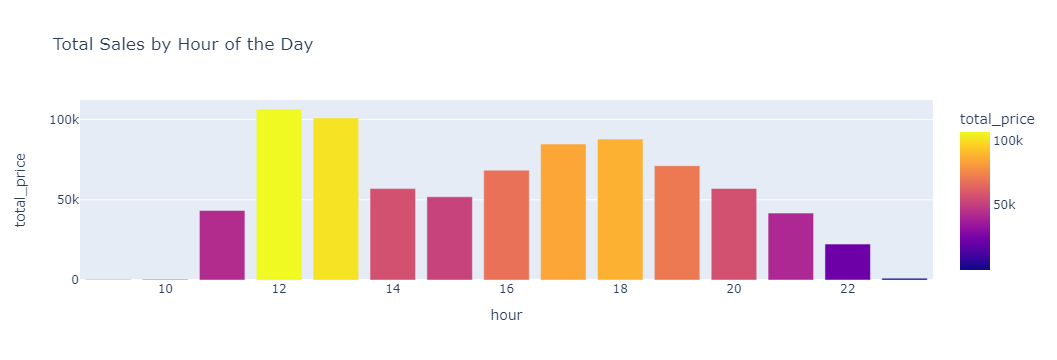

In [41]:
# Order trends by hour of the day
orders_by_hour = df_cleaned.groupby('hour')['total_price'].sum().reset_index()
fig_bar_hour = px.bar(orders_by_hour, x='hour', y='total_price', title='Total Sales by Hour of the Day', color='total_price')
fig_bar_hour.show()